In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
folder = "D:/py_trade/data/AMZN.xlsx"

amzn = pd.read_excel(folder).drop(["Adj Close"], axis=1)
amzn = pd.DataFrame(amzn).set_index("Date")

In [31]:
amzn

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000
...,...,...,...,...,...
2023-01-30,101.089996,101.739998,99.010002,100.550003,70691900
2023-01-31,101.160004,103.349998,101.139999,103.129997,66527300
2023-02-01,102.529999,106.239998,101.239998,105.150002,80450100


<AxesSubplot: xlabel='Date'>

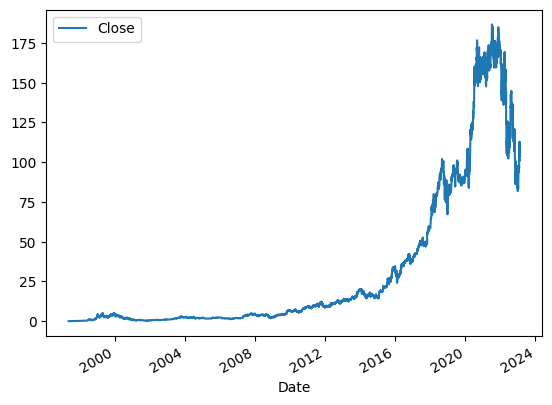

In [32]:
amzn.plot.line(y="Close", use_index=True)

In [33]:
# Membuat kolom baru bernama 'Tomorrow' berisi angka mundur dari Close
# Maksudnya angka mundur adalah dari kolom Close bergeser satu baris ke belakang
amzn["Tomorrow"] = amzn["Close"].shift(-1)

amzn

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.085417
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.081771
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.071354
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.069792
...,...,...,...,...,...,...
2023-01-30,101.089996,101.739998,99.010002,100.550003,70691900,103.129997
2023-01-31,101.160004,103.349998,101.139999,103.129997,66527300,105.150002
2023-02-01,102.529999,106.239998,101.239998,105.150002,80450100,112.910004


In [34]:
# membuat kolom baru bernama "Target" yang berisi nilai boolean
# untuk membandingkan apakah kolom Tomorrow lebih besar dari kolom Close
# Jika kolom Target bernilai 1, artinya mengindikasikan adanya kenaikan harga saham
# terjadi sejak penutupan market (Close) lalu naik pada esok harinya (Tomorrow)
amzn["Target"] = (amzn["Tomorrow"] > amzn["Close"]).astype(int)

amzn

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.086458,0
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.085417,0
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.081771,0
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.071354,0
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.069792,0
...,...,...,...,...,...,...,...
2023-01-30,101.089996,101.739998,99.010002,100.550003,70691900,103.129997,1
2023-01-31,101.160004,103.349998,101.139999,103.129997,66527300,105.150002,1
2023-02-01,102.529999,106.239998,101.239998,105.150002,80450100,112.910004,1


In [23]:
# Menampilkan hasilnya ke dalam file excel
saveToExcel = pd.ExcelWriter("D:/py_trade/data/models/AMAZON_Models.xlsx", engine="openpyxl")
amzn.to_excel(saveToExcel, sheet_name="AMZN")
saveToExcel.close()

In [37]:
# Membuat training model
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = amzn.iloc[:-100]
test = amzn.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [41]:
from sklearn.metrics import precision_score


preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [42]:
precision_score(test["Target"], preds)

0.4533333333333333

In [43]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot: xlabel='Date'>

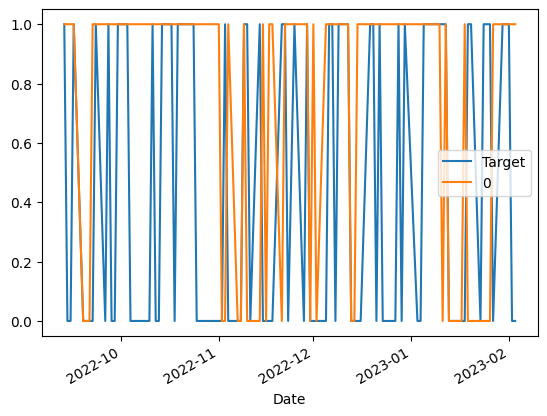

In [44]:
combined.plot()

In [45]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [46]:
def backtest(data, model, predictors, start=2500, step=250):

    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)


In [47]:
predictions = backtest(amzn, model, predictors)

In [48]:
predictions["Predictions"].value_counts()

0    3142
1     832
Name: Predictions, dtype: int64

In [49]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5132211538461539

In [50]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.519628
0    0.480372
Name: Target, dtype: float64